In [1]:
import pandas as pd
pd.pandas.set_option('display.max_columns',None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr

In [2]:
df_train= pd.read_csv("Property_Price_Train.csv")
df_train.head(3)

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,TF,0,NaN,Attchd,2003.0,RFn,2,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,TF,1,TA,Attchd,1976.0,RFn,2,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,TF,1,TA,Attchd,2001.0,RFn,2,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [3]:
# checking the null values in train data
missing_train = df_train.isnull().sum()/len(df_train)*100
missing_train = missing_train[missing_train>0]
missing_train.sort_values(inplace = True, ascending=False)
missing_train.head(10)

Pool_Quality             99.520219
Miscellaneous_Feature    96.298835
Lane_Type                93.762851
Fence_Quality            80.740233
Fireplace_Quality        47.224126
Lot_Extent               17.751885
Garage_Built_Year         5.551748
Garage                    5.551748
Garage_Finish_Year        5.551748
Garage_Quality            5.551748
dtype: float64

In [4]:
df_train.shape

(1459, 81)

In [5]:
df_train.drop(['Pool_Quality','Miscellaneous_Feature','Lane_Type','Fence_Quality','Fireplace_Quality'], axis=1, inplace=True)

In [6]:
df_train.shape

(1459, 76)

In [7]:
# Numerical variable and catedorical variable in train dataset
numeric_data= df_train.select_dtypes(include=[np.number])

# Categoruial variable
categorical_data= df_train.select_dtypes(exclude=[np.number])

# out-put
print("There are {} numeical and {} cateogrical feature in dataset". format(numeric_data.shape[1],categorical_data.shape[1]))

There are 38 numeical and 38 cateogrical feature in dataset


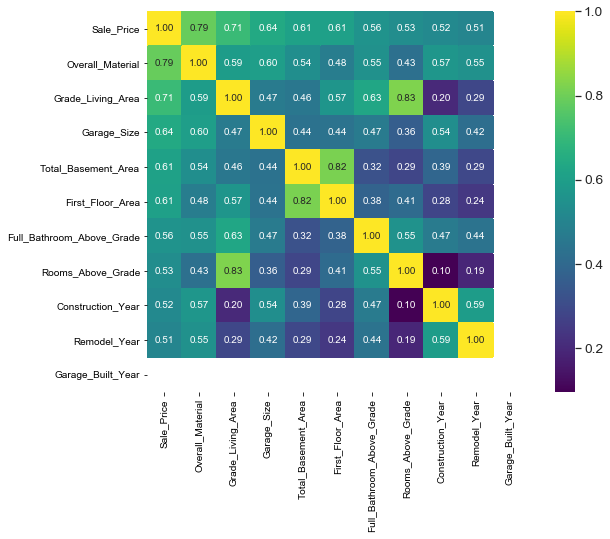

In [8]:
# displays the correlation between the columns and examine the correlations between the features and the target.
f, ax = plt.subplots(figsize=(10, 7))
corr = numeric_data.corr()
cols = corr.nlargest(11, 'Sale_Price')['Sale_Price'].index
cm = np.corrcoef(numeric_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,cmap ='viridis', fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [9]:
corr=corr['Sale_Price'].sort_values(ascending=True)

In [10]:
df_train.drop(['Kitchen_Above_Grade','Building_Class','House_Condition','LowQualFinSF','Year_Sold','Miscellaneous_Value','Underground_Half_Bathroom',
'BsmtFinSF2','Open_Lobby_Area','Garage_Area','Enclosed_Lobby_Area','Three_Season_Lobby_Area','Month_Sold','Pool_Area'],axis=1, inplace=True)

In [11]:
df_train.shape

(1459, 62)

In [12]:
numeric_data.isnull().sum().sum()

348

In [13]:
numerical_with_nan=[feature for feature in numeric_data.columns if numeric_data[feature].isnull().sum()>0 and numeric_data[feature].dtypes!='O']

In [14]:
for i in numerical_with_nan:
    df_train[i]=df_train[i].fillna(df_train[i].mean())

In [15]:
# Numerical variable and catedorical variable in train dataset
numeric_data= df_train.select_dtypes(include=[np.number])

# Categoruial variable
categorical_data= df_train.select_dtypes(exclude=[np.number])

# out-put
print("There are {} numeical and {} cateogrical feature in dataset". format(numeric_data.shape[1],categorical_data.shape[1]))

There are 24 numeical and 38 cateogrical feature in dataset


In [16]:
numeric_data.isnull().sum().sum()

0

C:\Users\ashish\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ashish\Anaconda3\lib\site-packages\scipy\stats\stats.py:3339: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


<module 'matplotlib.pyplot' from 'C:\\Users\\ashish\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

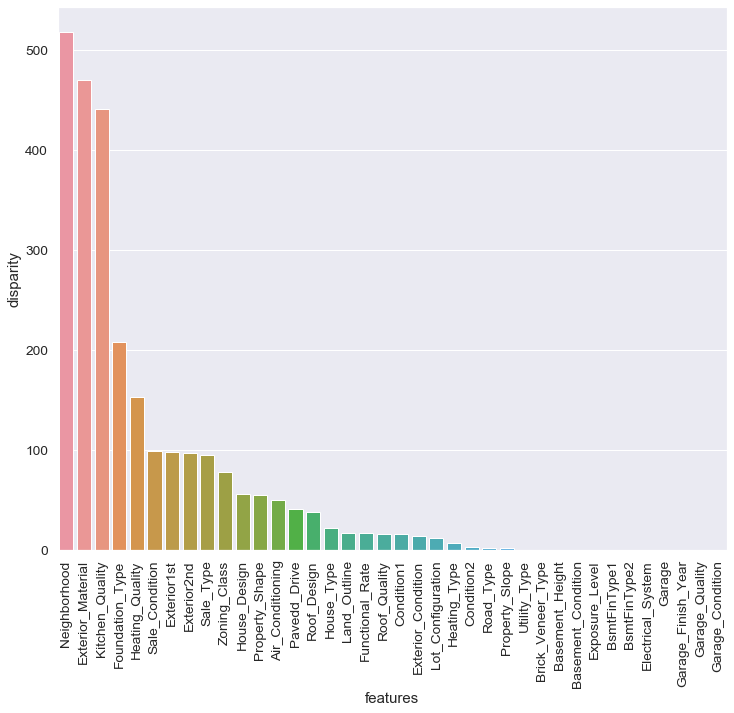

In [17]:
# ANOVA test to understand the correlation between categorical variables and SalePrice.
fig = plt.figure(figsize=(12,10))
cat_data = df_train.select_dtypes(exclude=[np.number])
cat = [f for f in df_train.columns if df_train.dtypes[f] == 'object']
def anova(frame):
    anv = pd.DataFrame()
    anv['features'] = cat
    pvals = []
    for c in cat:
           samples = []
           for cls in frame[c].unique():
                  s = frame[frame[c] == cls]['Sale_Price'].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

cat_data['Sale_Price'] = df_train.Sale_Price.values
k = anova(cat_data) 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data=k, x = 'features', y='disparity') 
plt.xticks(rotation=90) 
plt 



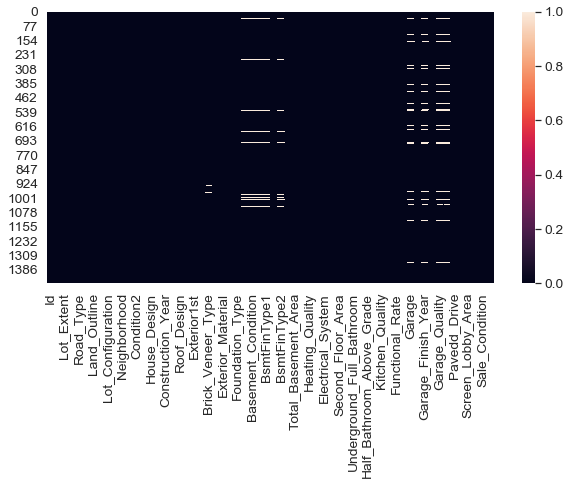

In [18]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_train.isnull())


In [19]:
for i in categorical_data:
    df_train[i]=df_train[i].fillna(df_train[i].mode()[0])

In [20]:
# Numerical variable and catedorical variable in train dataset
numeric_data= df_train.select_dtypes(include=[np.number])

# Categoruial variable
categorical_data= df_train.select_dtypes(exclude=[np.number])

# out-put
print("There are {} numeical and {} cateogrical feature in dataset". format(numeric_data.shape[1],categorical_data.shape[1]))

There are 24 numeical and 38 cateogrical feature in dataset


In [21]:
categorical_data.isnull().sum().sum()

0

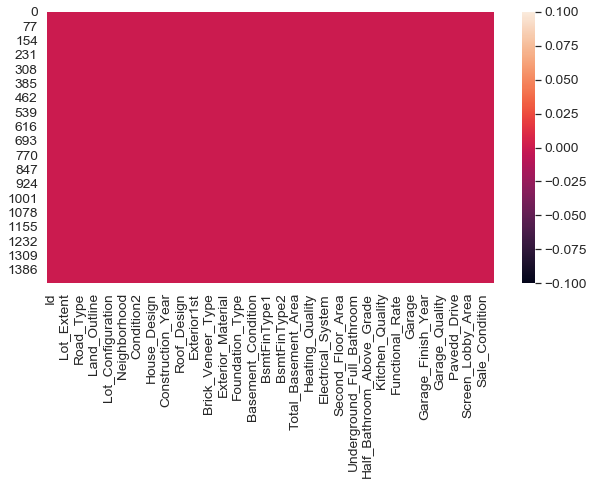

In [22]:
plt.figure(figsize=(10, 5))
sns.heatmap(df_train.isnull())

In [23]:
df_train.head(3)

,Id,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,Grade_Living_Area,Underground_Full_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Screen_Lobby_Area,Sale_Type,Sale_Condition,Sale_Price
0,1,RLD,65.0,8450,Paved,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,3,Gd,8,TF,0,Attchd,2003.0,RFn,2,TA,TA,Y,163.788080,0,WD,Normal,208500
1,2,RLD,80.0,9600,Paved,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,1976,1976,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,TA,6,TF,1,Attchd,1976.0,RFn,2,TA,TA,Y,198.900074,0,WD,Normal,181500
2,3,RLD,68.0,11250,Paved,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,2,1,3,Gd,6,TF,1,Attchd,2001.0,RFn,2,TA,TA,Y,26.127533,0,WD,Normal,223500


In [24]:
df_test= pd.read_csv("df_test.csv")
df_test.shape

(1459, 61)

In [25]:
df_test.head(3)

,Id,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,Grade_Living_Area,Underground_Full_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Screen_Lobby_Area,Sale_Type,Sale_Condition
0,1461,RHD,80.0,16104.81976,Paved,Reg,Lvl,AllPub,I,GS,NAmes,Feedr,Norm,1Fam,1Story,5,1961,1961,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,CB,TA,TA,No,Rec,468.0,LwQ,270.0,882.0,GasA,TA,Y,SBrkr,896,0,896,0.0,1,0,2,TA,5,TF,0,Attchd,1961.0,Unf,1.0,TA,TA,Y,140,120,WD,Normal
1,1462,RLD,81.0,15639.15081,Paved,IR1,Lvl,AllPub,C,GS,NAmes,Norm,Norm,1Fam,1Story,6,1958,1958,Hip,SS,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CB,TA,TA,No,ALQ,923.0,Unf,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,1329,0.0,1,1,3,Gd,6,TF,0,Attchd,1958.0,Unf,1.0,TA,TA,Y,393,0,WD,Normal
2,1463,RLD,74.0,3849.42892,Paved,IR1,Lvl,AllPub,I,GS,Gilbert,Norm,Norm,1Fam,2Story,5,1997,1998,Gable,SS,VinylSd,VinylSd,None,0.0,TA,TA,PC,Gd,TA,No,GLQ,791.0,Unf,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,1629,0.0,2,1,3,TA,6,TF,1,Attchd,1997.0,Fin,2.0,TA,TA,Y,212,0,WD,Normal


##### train set_Labelling

In [26]:
#  On test set
numeric_data= df_train.select_dtypes(include=[np.number])
categorical_data= df_train.select_dtypes(exclude=[np.number])

In [27]:
cols_test =['Zoning_Class', 'Road_Type', 'Property_Shape', 'Land_Outline',
       'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'Condition2', 'House_Type', 'House_Design', 'Roof_Design',
       'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinType2', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'Kitchen_Quality',
       'Functional_Rate', 'Garage', 'Garage_Finish_Year', 'Garage_Quality',
       'Garage_Condition', 'Pavedd_Drive', 'Sale_Type', 'Sale_Condition']

In [28]:
from sklearn.preprocessing import LabelEncoder
for c in cols_test:
    lbl = LabelEncoder() 
    lbl.fit(list(df_train[c].values)) 
    df_train[c] = lbl.transform(list(df_train[c].values))

In [29]:
df_train.head(2)

,Id,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,Grade_Living_Area,Underground_Full_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Screen_Lobby_Area,Sale_Type,Sale_Condition,Sale_Price
0,1,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,2003,2003,1,4,12,13,1,196.0,2,4,2,2,3,3,2,706,5,150,856,1,0,1,4,856,854,1710,1,2,1,3,2,8,7,0,2,2003.0,1,2,4,4,2,163.788080,0,8,4,208500
1,2,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,1976,1976,1,4,8,8,2,0.0,3,4,1,2,3,1,0,978,5,284,1262,1,0,1,4,1262,0,1262,0,2,0,3,3,6,7,1,2,1976.0,1,2,4,4,2,198.900074,0,8,4,181500


#####  test_set_Labelling

In [30]:
# on test set
numeric_data= df_test.select_dtypes(include=[np.number])
categorical_data= df_test.select_dtypes(exclude=[np.number])

cols_test =['Zoning_Class', 'Road_Type', 'Property_Shape', 'Land_Outline',
       'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'Condition2', 'House_Type', 'House_Design', 'Roof_Design',
       'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinType2', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'Kitchen_Quality',
       'Functional_Rate', 'Garage', 'Garage_Finish_Year', 'Garage_Quality',
       'Garage_Condition', 'Pavedd_Drive', 'Sale_Type', 'Sale_Condition']

In [31]:
from sklearn.preprocessing import LabelEncoder
for c in cols_test:
    lbl = LabelEncoder() 
    lbl.fit(list(df_test[c].values)) 
    df_test[c] = lbl.transform(list(df_test[c].values))

In [32]:
df_test.head(2)

,Id,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,Grade_Living_Area,Underground_Full_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Screen_Lobby_Area,Sale_Type,Sale_Condition
0,1461,2,80.0,16104.81976,1,3,3,0,4,0,12,1,3,0,2,5,1961,1961,1,0,10,12,2,0.0,3,4,1,3,3,3,4,468.0,3,270.0,882.0,0,4,1,3,896,0,896,0.0,1,0,2,3,5,7,0,2,1961.0,2,1.0,3,4,2,140,120,8,6
1,1462,3,81.0,15639.15081,1,0,3,0,0,0,12,3,3,0,2,6,1958,1958,3,0,11,13,1,108.0,3,4,1,3,3,3,0,923.0,5,406.0,1329.0,0,4,1,3,1329,0,1329,0.0,1,1,3,2,6,7,0,2,1958.0,2,1.0,3,4,2,393,0,8,6


#### Train_test_Split

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('Sale_Price', axis=1), df_train['Sale_Price'], test_size=0.3, random_state=101)

#### Scaling & reshaping

In [34]:
# we are going to scale to data

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 61)
(438, 61)
(1021, 1)
(438, 1)


### Linear Regression 

In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [37]:
predictions = lm.predict(X_test)

In [38]:
predictions= predictions.reshape(-1,1)

### Perfromance Metrices

In [39]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2644298407080997
MSE: 0.26847503520345
RMSE: 0.5181457663664252


### Model on test_dataset  

In [40]:
# Create ID data frame
df_test_copy=df_test.copy()
test_id = df_test_copy['Id']
Name_Id = pd.DataFrame(test_id, columns=['Id'])

In [41]:
test = sc_X.fit_transform(df_test)

In [42]:
test_prediction_lm=lm.predict(test)
test_prediction_lm= test_prediction_lm.reshape(-1,1)

In [43]:
# inverse the test_prediction
test_prediction_lm =sc_y.inverse_transform(test_prediction_lm)

In [44]:
# dataframe_prediction
test_prediction_lm = pd.DataFrame(test_prediction_lm, columns=['Sale_Price'])

In [45]:
test_prediction_lm.head()

,Sale_Price
0,123116.547301
1,164225.309245
2,177269.043558
3,179117.063411
4,177481.614201


In [46]:
result = pd.concat([Name_Id,test_prediction_lm], axis=1)

In [47]:
result.head()

,Id,Sale_Price
0,1461,123116.547301
1,1462,164225.309245
2,1463,177269.043558
3,1464,179117.063411
4,1465,177481.614201


In [48]:
result.to_csv('submission.csv',index=False)

# SGDRegressor

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_train.drop('Sale_Price', axis=1), df_train['Sale_Price'], test_size=0.3, random_state=101)

In [50]:


y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [51]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(X_train,y_train)

C:\Users\ashish\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [52]:
predictions = sgd.predict(X_test)

predictions= predictions.reshape(-1,1)

In [53]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.25927684394202
MSE: 0.26494607085766086
RMSE: 0.5147291237706109


In [54]:
from sklearn.metrics import r2_score
(r2_score(y_test, predictions))

0.7350539291423391

In [55]:
df_test.head(3)

,Id,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,Grade_Living_Area,Underground_Full_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Screen_Lobby_Area,Sale_Type,Sale_Condition
0,1461,2,80.0,16104.81976,1,3,3,0,4,0,12,1,3,0,2,5,1961,1961,1,0,10,12,2,0.0,3,4,1,3,3,3,4,468.0,3,270.0,882.0,0,4,1,3,896,0,896,0.0,1,0,2,3,5,7,0,2,1961.0,2,1.0,3,4,2,140,120,8,6
1,1462,3,81.0,15639.15081,1,0,3,0,0,0,12,3,3,0,2,6,1958,1958,3,0,11,13,1,108.0,3,4,1,3,3,3,0,923.0,5,406.0,1329.0,0,4,1,3,1329,0,1329,0.0,1,1,3,2,6,7,0,2,1958.0,2,1.0,3,4,2,393,0,8,6
2,1463,3,74.0,3849.42892,1,0,3,0,4,0,8,3,3,0,4,5,1997,1998,1,0,10,12,2,0.0,3,4,2,2,3,3,2,791.0,5,137.0,928.0,0,2,1,3,928,701,1629,0.0,2,1,3,3,6,7,1,2,1997.0,0,2.0,3,4,2,212,0,8,6


In [56]:
# Create ID data frame
df_test_copy=df_test.copy()
test_id = df_test_copy['Id']
Name_Id = pd.DataFrame(test_id, columns=['Id'])

In [57]:
test = sc_X.fit_transform(df_test)

In [58]:
test_prediction_sgd=sgd.predict(test)
test_prediction_sgd= test_prediction_sgd.reshape(-1,1)

In [59]:
# inverse the test_prediction
test_prediction_sgd =sc_y.inverse_transform(test_prediction_sgd)

In [60]:
# dataframe_prediction
test_prediction_sgd = pd.DataFrame(test_prediction_sgd, columns=['Sale_Price'])

In [61]:
test_prediction_sgd.head()

,Sale_Price
0,120830.900742
1,166711.987845
2,176855.251694
3,178713.634062
4,176380.845589


In [62]:
result_sgd = pd.concat([Name_Id,test_prediction_lm], axis=1)

In [63]:
result_sgd.head()

,Id,Sale_Price
0,1461,123116.547301
1,1462,164225.309245
2,1463,177269.043558
3,1464,179117.063411
4,1465,177481.614201


In [64]:
result_sgd.to_csv('submission_sgd.csv',index=False)